In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score



In [3]:
df=pd.read_csv('house_price.csv')
df

,House_Size,Num_Rooms,Num_Bathrooms,Age,Distance_to_City,Price
0,1360,6,1,24,6.95,250.96
1,4272,7,1,10,16.17,857.95
2,3592,2,4,14,19.39,612.19
3,966,2,2,6,17.28,240.90
4,4926,2,1,3,3.24,750.50
...,...,...,...,...,...,...
795,2843,3,2,8,17.77,490.25
796,2363,7,2,5,1.99,546.29
797,1818,7,2,28,4.63,427.96
798,4097,4,1,16,6.89,689.53


In [4]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i]) 
df

,House_Size,Num_Rooms,Num_Bathrooms,Age,Distance_to_City,Price
0,1360,6,1,24,6.95,250.96
1,4272,7,1,10,16.17,857.95
2,3592,2,4,14,19.39,612.19
3,966,2,2,6,17.28,240.90
4,4926,2,1,3,3.24,750.50
...,...,...,...,...,...,...
795,2843,3,2,8,17.77,490.25
796,2363,7,2,5,1.99,546.29
797,1818,7,2,28,4.63,427.96
798,4097,4,1,16,6.89,689.53


In [5]:
x=df.drop(["Price"],axis=1)
y=df["Price"]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred=model.predict(x_test)
y_pred

array([556.7069, 226.5753, 631.9691, 577.3088, 274.3875, 621.2645,
       315.4145, 320.804 , 520.5894, 633.5594, 442.859 , 270.6582,
       445.8357, 245.1836, 223.9711, 535.3279, 267.2842, 352.6848,
       363.4647, 399.5513, 890.7482, 625.1356, 695.9518, 370.7884,
       465.4833, 624.7642, 251.9644, 663.5271, 771.2034, 241.8884,
       576.8838, 538.2267, 590.299 , 545.2921, 203.563 , 462.5231,
       471.8355, 552.2009, 531.9449, 437.2798, 706.0029, 465.1701,
       503.0604, 887.1243, 276.8396, 685.0054, 356.7382, 214.8755,
       499.4737, 220.202 , 539.3685, 431.3691, 283.2413, 684.4218,
       313.5175, 716.5998, 239.9999, 591.6473, 674.4705, 263.3688,
       416.4542, 539.8911, 549.5077, 786.8194, 359.1976, 798.8893,
       653.7377, 605.888 , 491.1148, 654.9582, 723.4787, 263.7965,
       477.4282, 253.4089, 635.6244, 804.9912, 453.7388, 449.1496,
       330.9548, 370.486 , 728.0223, 353.4768, 255.8988, 453.0036,
       505.4448, 797.1139, 389.2754, 433.4454, 523.9413, 202.2

In [9]:
print("R2 Score:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print("RMSE:",RMSE)

R2 Score: 0.9009396311765684
MSE: 3592.653591838879
RMSE: 59.93874866760966


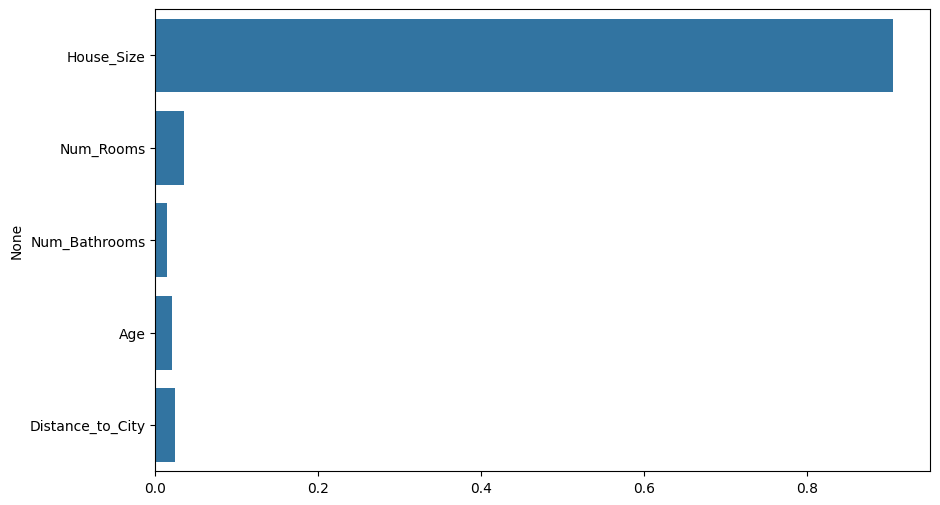

In [10]:
plt.figure(figsize=[10,6])
sns.barplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [11]:
new_data=pd.DataFrame({
"House_Size":[1500],
 "Num_Rooms":[3],
 "Num_Bathrooms":[2],
 "Age":[65],
 "Distance_to_City":[2.5],
})
predict=model.predict(new_data)
predict

array([302.5567])